# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from wordcloud import WordCloud
from lxml import etree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
import plotly.express as px
from pyarabic.trans import normalize_digits
from camel_tools.utils.normalize import normalize_teh_marbuta_ar, normalize_alef_maksura_ar, normalize_alef_ar
import arabic_reshaper
from sklearn.linear_model import SGDClassifier
import arabicstopwords.arabicstopwords as stp
from bidi.algorithm import get_display
from nltk import pos_tag
from plotly import graph_objects as go
import pyarabic.araby as araby
import qalsadi.lemmatizer
import emoji
from collections import Counter
import string
import re
import os
import warnings
import random
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
random.seed(10)

In [2]:
colors1=['#fe726f', '#e44744', '#b13735']
colors2=['#f8ab91', '#f58a65', '#f26839']
colors3=['#10eaf6', '#0cbbc4', '#098c93']
colors4=['#66b2b2', '#008080', '#006666']

# Download Some Packages

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Ignore Warnings

In [4]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [5]:
Corpus = pd.read_csv('CompanyReviews.csv')
Corpus.rename(columns={'review_description': 'Review', 'rating': 'Sentiment', 'company': 'Company'}, inplace=True)
Corpus.drop('Unnamed: 0', axis=1, inplace=True)
Corpus['Company'] = Corpus['Company'].str.title()
Corpus['Sentiment'] = Corpus['Sentiment'].map({-1: 'Negative', 0: 'Neutral',  1: 'Positive'})
Corpus.dropna(inplace=True)

# Percantage Of Each Sentiment

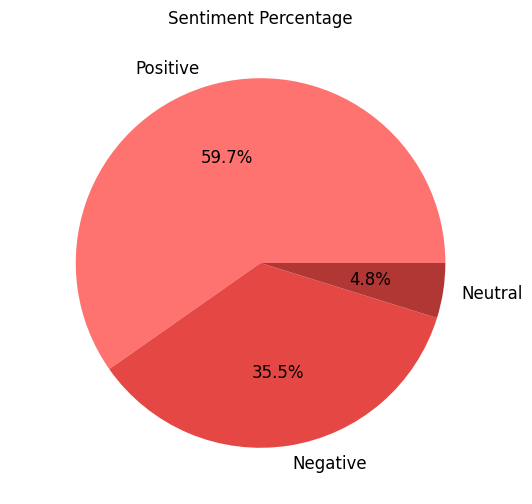

In [6]:
Corpus['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Sentiment Percentage',
                                                    figsize = (6,6),
                                                    colors = colors1,
                                                    ylabel = ' ');

# Count Of Each Sentiment

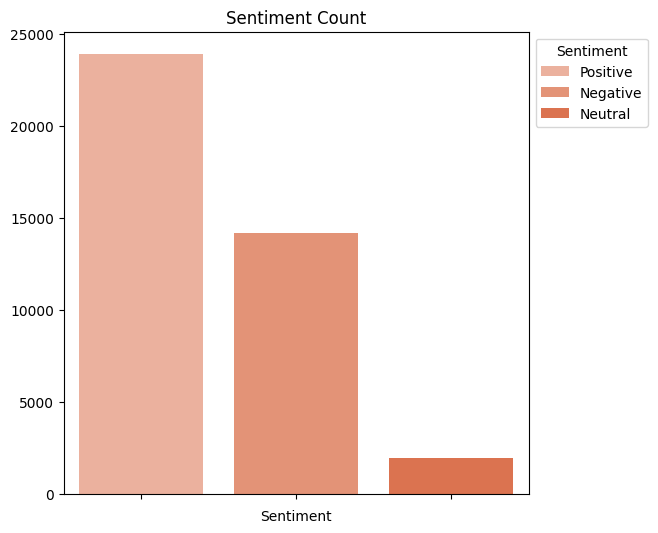

In [7]:
ax, fig = plt.subplots(figsize = (6,6))
ax =sns.countplot(x='Sentiment', data=Corpus, dodge=False, hue='Sentiment',  order= Corpus['Sentiment'].value_counts().index, hue_order =Corpus['Sentiment'].value_counts().index,  palette=colors2);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Sentiment Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

# Sentiment Information For Each Company

**1.Capiter**

In [8]:
Capiter = Corpus[Corpus['Company'] == 'Capiter']

In [9]:
Capiter['Sentiment'].value_counts()

Sentiment
Positive    51
Negative    19
Neutral      3
Name: count, dtype: int64

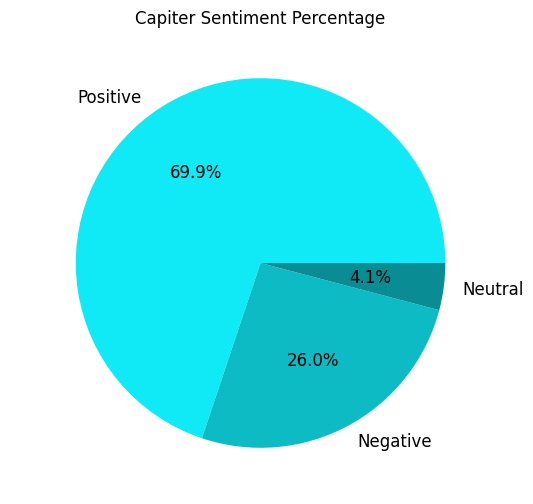

In [10]:
Capiter['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Capiter Sentiment Percentage',
                                                    figsize = (6,6),
                                                    colors = colors3,
                                                    ylabel = ' ');

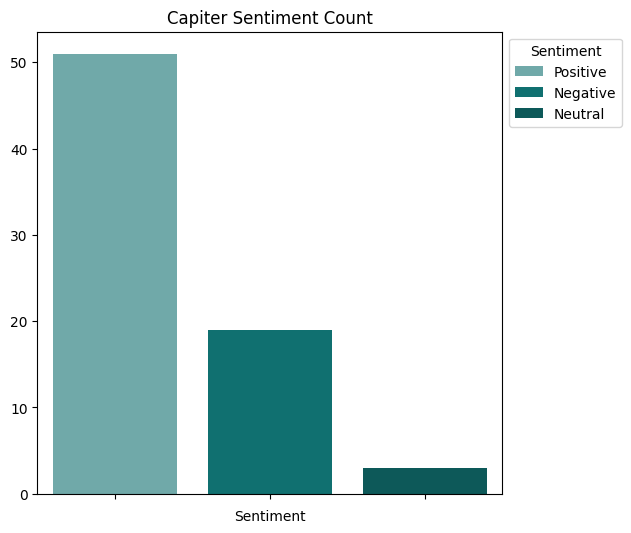

In [11]:
ax, fig = plt.subplots(figsize = (6,6))
ax =sns.countplot(x='Sentiment', data=Capiter, dodge=False, hue='Sentiment',  order= Capiter['Sentiment'].value_counts().index, hue_order =Capiter['Sentiment'].value_counts().index,  palette=colors4);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Capiter Sentiment Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

**2.Domty**

In [12]:
Domty = Corpus[Corpus['Company'] == 'Domty']

In [13]:
Domty['Sentiment'].value_counts()

Sentiment
Negative    2
Positive    2
Name: count, dtype: int64

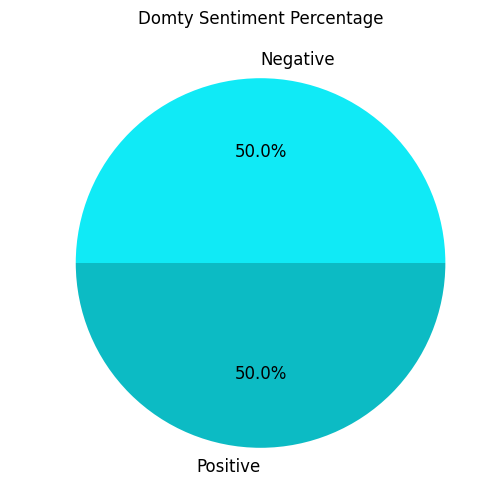

In [14]:
Domty['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Domty Sentiment Percentage',
                                                    figsize = (6,6),
                                                    colors = colors3,
                                                    ylabel = ' ');

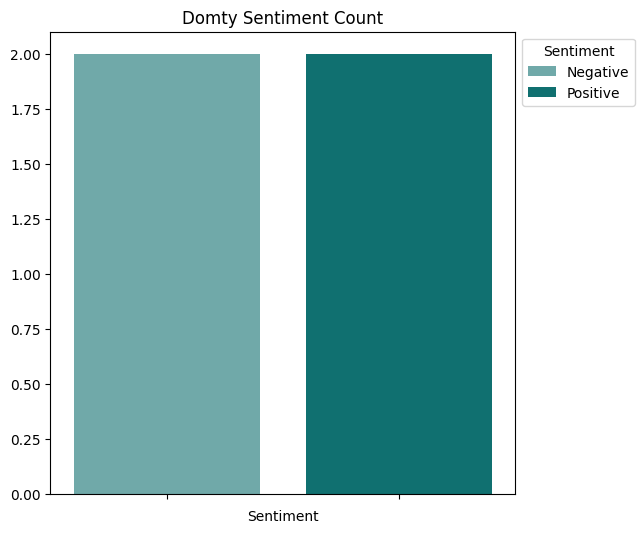

In [15]:
ax, fig = plt.subplots(figsize = (6,6))
ax =sns.countplot(x='Sentiment', data=Domty, dodge=False, hue='Sentiment',  order= Domty['Sentiment'].value_counts().index, hue_order =Domty['Sentiment'].value_counts().index,  palette=colors4);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Domty Sentiment Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

**3.Elsewedy**

In [16]:
Elsewedy = Corpus[Corpus['Company'] == 'Elsewedy']

In [17]:
Elsewedy['Sentiment'].value_counts()

Sentiment
Positive    102
Negative     39
Neutral       6
Name: count, dtype: int64

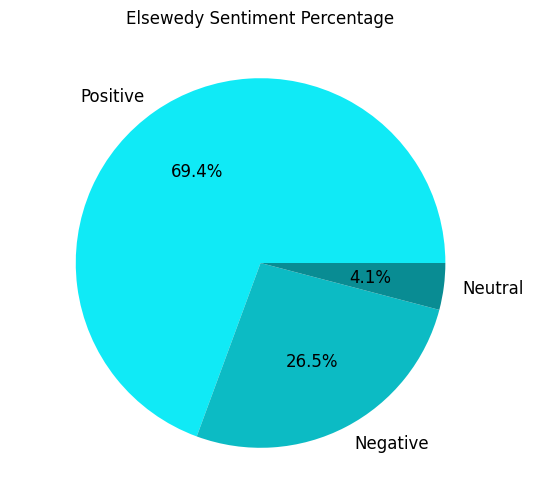

In [18]:
Elsewedy['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Elsewedy Sentiment Percentage',
                                                    figsize = (6,6),
                                                    colors = colors3,
                                                    ylabel = ' ');

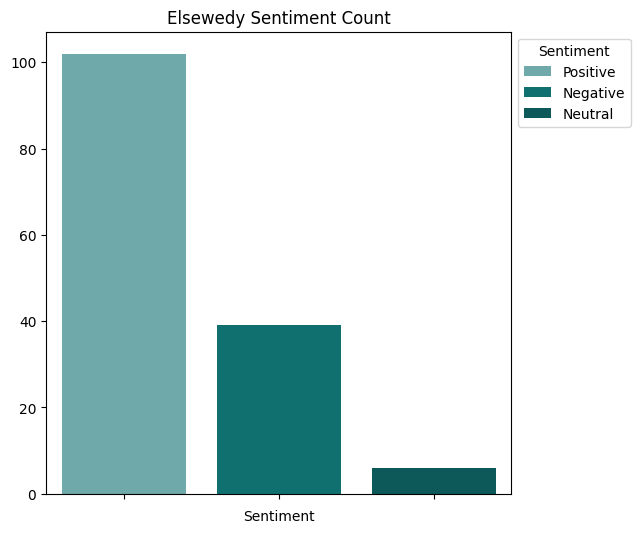

In [19]:
ax, fig = plt.subplots(figsize = (6,6))
ax =sns.countplot(x='Sentiment', data=Elsewedy, dodge=False, hue='Sentiment',  order= Elsewedy['Sentiment'].value_counts().index, hue_order =Elsewedy['Sentiment'].value_counts().index,  palette=colors4);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Elsewedy Sentiment Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

**4.Ezz Steel**

In [20]:
EzzSteel = Corpus[Corpus['Company'] == 'Ezz Steel']

In [21]:
EzzSteel['Sentiment'].value_counts()

Sentiment
Positive    38
Neutral      7
Negative     4
Name: count, dtype: int64

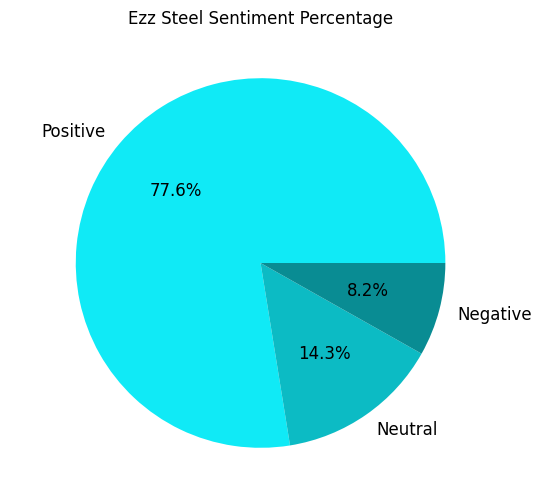

In [22]:
EzzSteel['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Ezz Steel Sentiment Percentage',
                                                    figsize = (6,6),
                                                    colors = colors3,
                                                    ylabel = ' ');

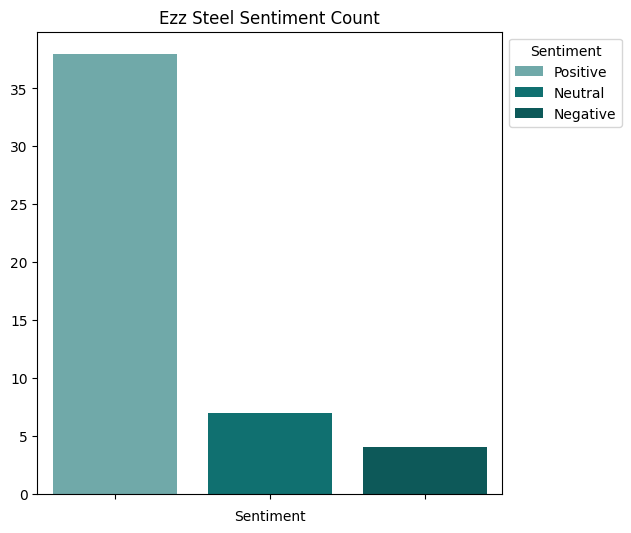

In [23]:
ax, fig = plt.subplots(figsize = (6,6))
ax =sns.countplot(x='Sentiment', data=EzzSteel, dodge=False, hue='Sentiment',  order= EzzSteel['Sentiment'].value_counts().index, hue_order =EzzSteel['Sentiment'].value_counts().index,  palette=colors4);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Ezz Steel Sentiment Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

**5.Hilton**

In [24]:
Hilton = Corpus[Corpus['Company'] == 'Hilton']

In [25]:
Hilton['Sentiment'].value_counts()

Sentiment
Positive    63
Negative    34
Neutral      3
Name: count, dtype: int64

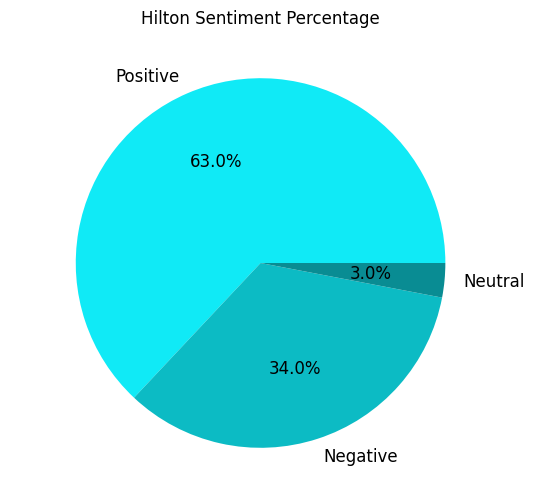

In [26]:
Hilton['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Hilton Sentiment Percentage',
                                                    figsize = (6,6),
                                                    colors = colors3,
                                                    ylabel = ' ');

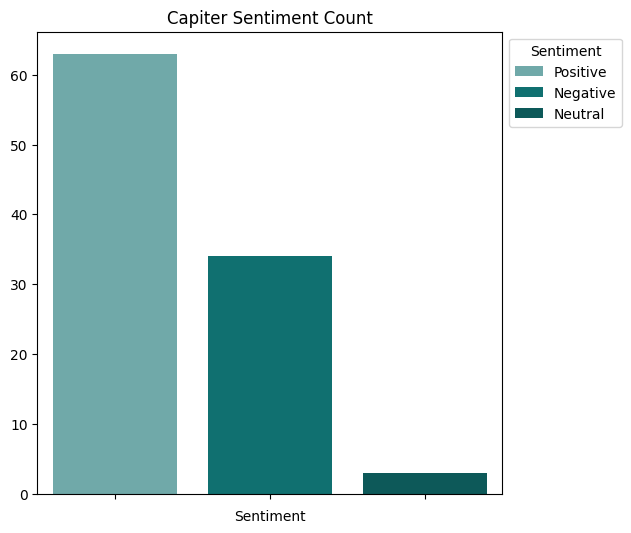

In [27]:
ax, fig = plt.subplots(figsize = (6,6))
ax =sns.countplot(x='Sentiment', data=Hilton, dodge=False, hue='Sentiment',  order= Hilton['Sentiment'].value_counts().index, hue_order =Hilton['Sentiment'].value_counts().index,  palette=colors4);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Capiter Sentiment Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

**6.Nestle**

In [28]:
Nestle = Corpus[Corpus['Company'] == 'Nestle']

In [29]:
Capiter['Sentiment'].value_counts()

Sentiment
Positive    51
Negative    19
Neutral      3
Name: count, dtype: int64

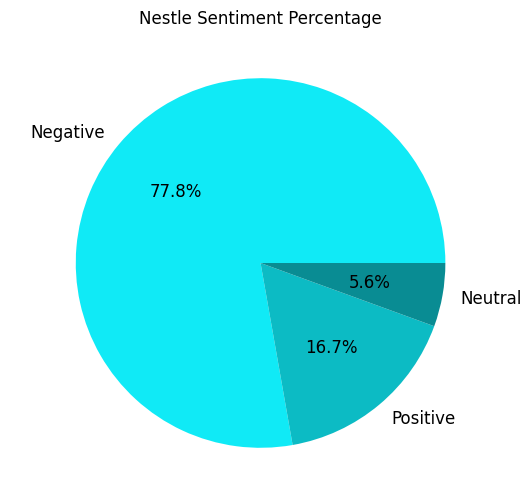

In [30]:
Nestle['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Nestle Sentiment Percentage',
                                                    figsize = (6,6),
                                                    colors = colors3,
                                                    ylabel = ' ');

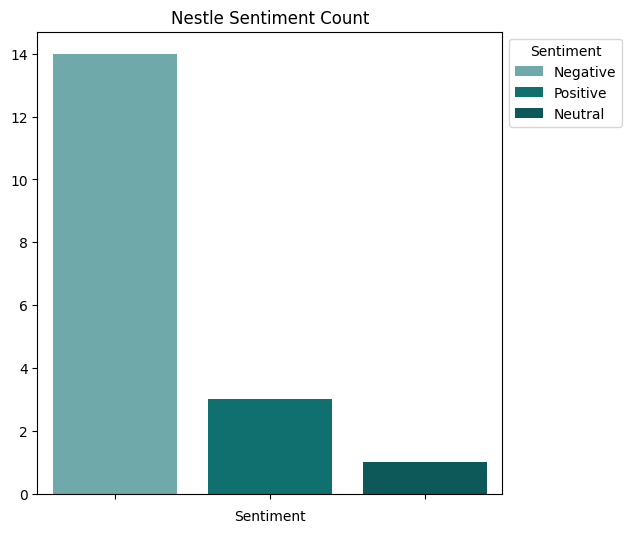

In [31]:
ax, fig = plt.subplots(figsize = (6,6))
ax =sns.countplot(x='Sentiment', data=Nestle, dodge=False, hue='Sentiment',  order= Nestle['Sentiment'].value_counts().index, hue_order =Nestle['Sentiment'].value_counts().index,  palette=colors4);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Nestle Sentiment Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

**7.Raya**

In [32]:
Raya = Corpus[Corpus['Company'] == 'Raya']

In [33]:
Raya['Sentiment'].value_counts()

Sentiment
Negative    181
Positive     79
Neutral       8
Name: count, dtype: int64

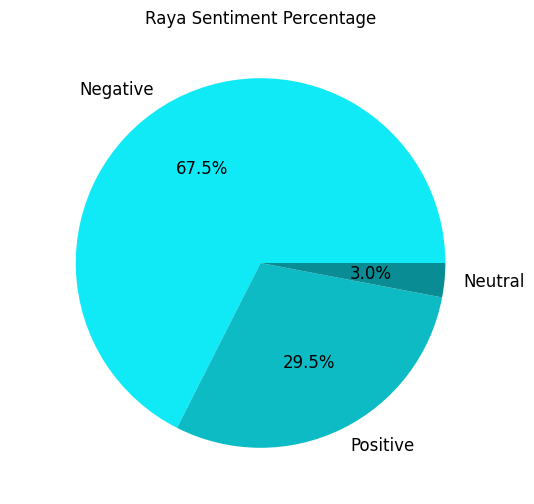

In [34]:
Raya['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Raya Sentiment Percentage',
                                                    figsize = (6,6),
                                                    colors = colors3,
                                                    ylabel = ' ');

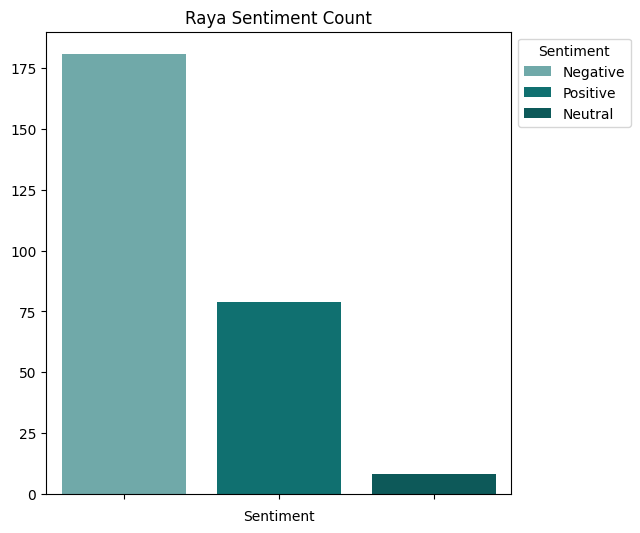

In [35]:
ax, fig = plt.subplots(figsize = (6,6))
ax =sns.countplot(x='Sentiment', data=Raya, dodge=False, hue='Sentiment',  order= Raya['Sentiment'].value_counts().index, hue_order =Raya['Sentiment'].value_counts().index,  palette=colors4);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Raya Sentiment Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

**8.Swvl**

In [36]:
Swvl = Corpus[Corpus['Company'] == 'Swvl']

In [37]:
Swvl['Sentiment'].value_counts()

Sentiment
Positive    2526
Negative    1849
Neutral      318
Name: count, dtype: int64

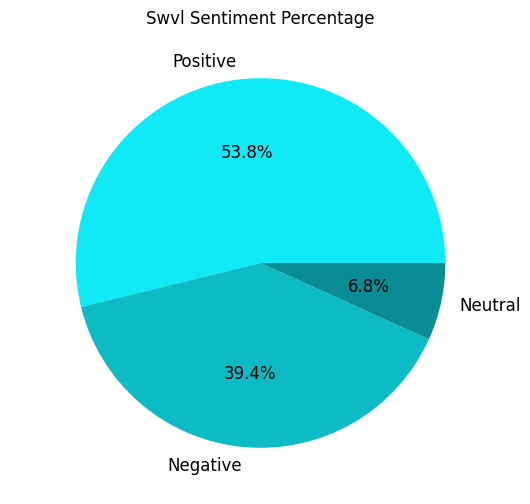

In [38]:
Swvl['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Swvl Sentiment Percentage',
                                                    figsize = (6,6),
                                                    colors = colors3,
                                                    ylabel = ' ');

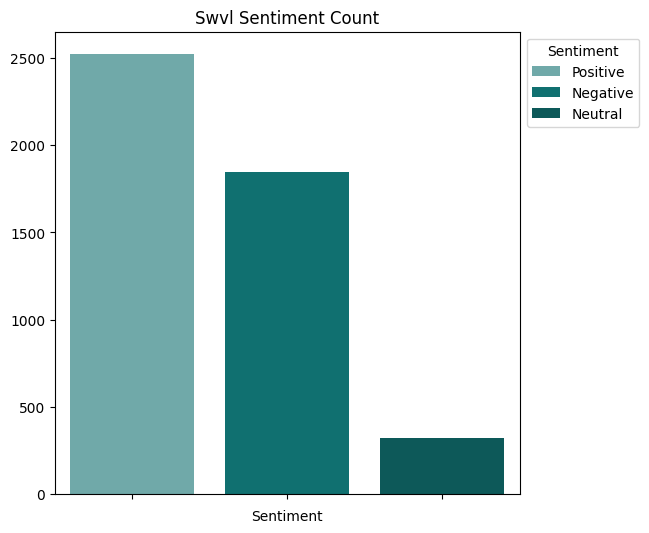

In [39]:
ax, fig = plt.subplots(figsize = (6,6))
ax =sns.countplot(x='Sentiment', data=Swvl, dodge=False, hue='Sentiment',  order= Swvl['Sentiment'].value_counts().index, hue_order =Swvl['Sentiment'].value_counts().index,  palette=colors4);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Swvl Sentiment Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

**9.Talbat**

In [40]:
Talbat = Corpus[Corpus['Company'] == 'Talbat']

In [41]:
Talbat['Sentiment'].value_counts()

Sentiment
Positive    19894
Negative    10696
Neutral      1482
Name: count, dtype: int64

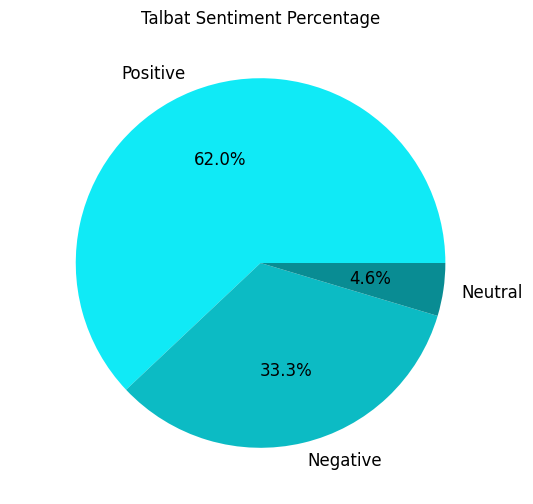

In [42]:
Talbat['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Talbat Sentiment Percentage',
                                                    figsize = (6,6),
                                                    colors = colors3,
                                                    ylabel = ' ');

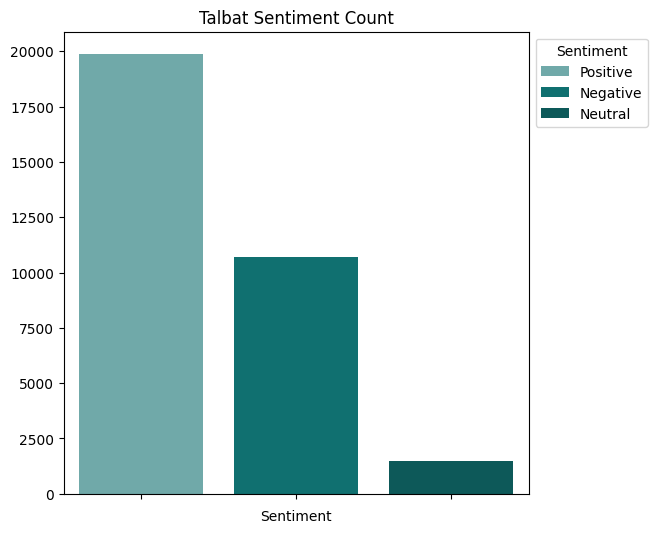

In [43]:
ax, fig = plt.subplots(figsize = (6,6))
ax =sns.countplot(x='Sentiment', data=Talbat, dodge=False, hue='Sentiment',  order= Talbat['Sentiment'].value_counts().index, hue_order =Talbat['Sentiment'].value_counts().index,  palette=colors4);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Talbat Sentiment Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

**10.Telecom Egypt**

In [44]:
TelecomEgypt = Corpus[Corpus['Company'] == 'Telecom_Egypt']

In [45]:
TelecomEgypt['Sentiment'].value_counts()

Sentiment
Negative    1227
Positive     793
Neutral       70
Name: count, dtype: int64

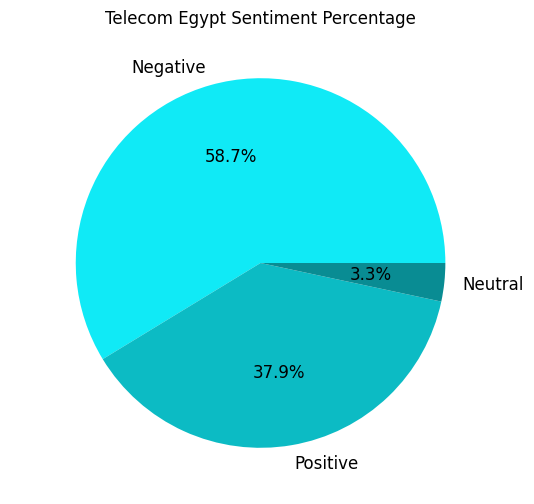

In [46]:
TelecomEgypt['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Telecom Egypt Sentiment Percentage',
                                                    figsize = (6,6),
                                                    colors = colors3,
                                                    ylabel = ' ');

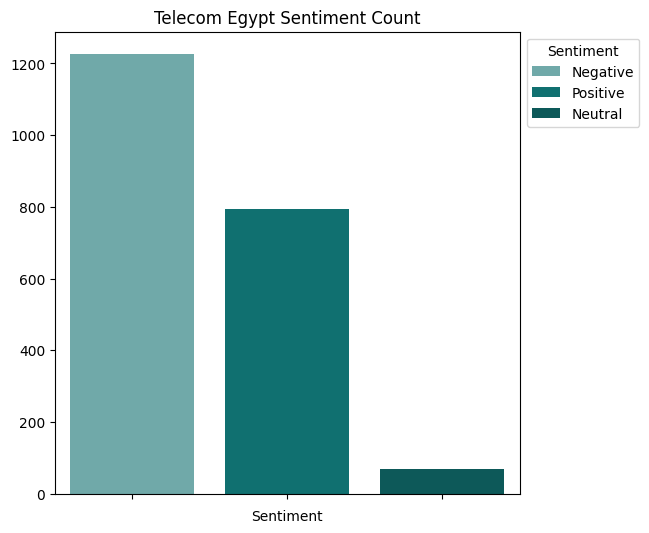

In [47]:
ax, fig = plt.subplots(figsize = (6,6))
ax =sns.countplot(x='Sentiment', data=TelecomEgypt, dodge=False, hue='Sentiment',  order= TelecomEgypt['Sentiment'].value_counts().index, hue_order =TelecomEgypt['Sentiment'].value_counts().index,  palette=colors4);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Telecom Egypt Sentiment Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

**11.Tmg**

In [48]:
Tmg = Corpus[Corpus['Company'] == 'Tmg']

In [49]:
Tmg['Sentiment'].value_counts()

Sentiment
Positive    184
Negative     49
Neutral      17
Name: count, dtype: int64

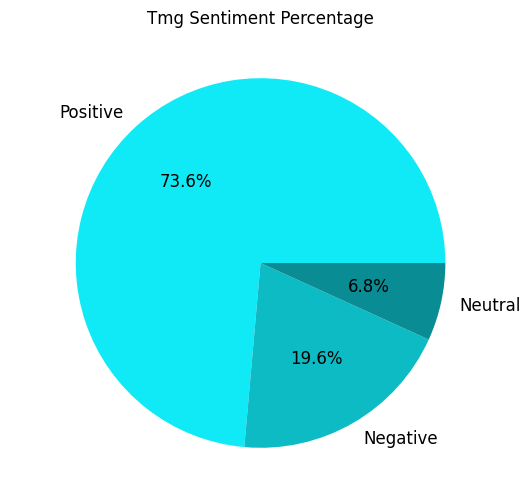

In [50]:
Tmg['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Tmg Sentiment Percentage',
                                                    figsize = (6,6),
                                                    colors = colors3,
                                                    ylabel = ' ');

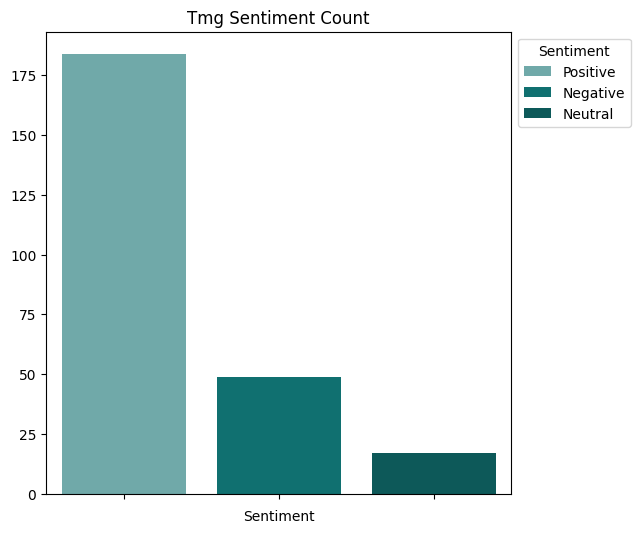

In [51]:
ax, fig = plt.subplots(figsize = (6,6))
ax =sns.countplot(x='Sentiment', data=Tmg, dodge=False, hue='Sentiment',  order= Tmg['Sentiment'].value_counts().index, hue_order =Tmg['Sentiment'].value_counts().index,  palette=colors4);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Tmg Sentiment Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

**12.Venus**

In [52]:
Venus = Corpus[Corpus['Company'] == 'Venus']

In [53]:
Venus['Sentiment'].value_counts()

Sentiment
Positive    186
Negative     85
Neutral      10
Name: count, dtype: int64

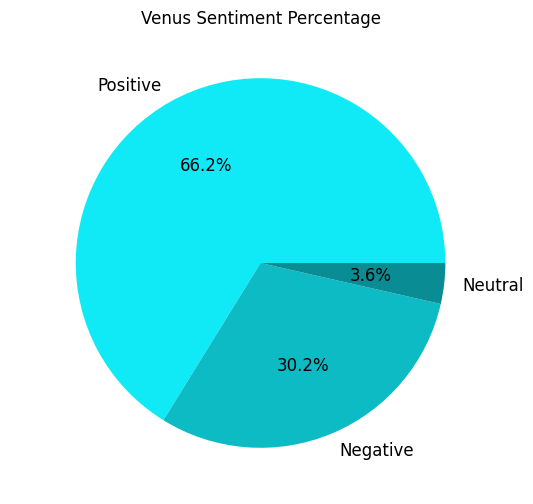

In [54]:
Venus['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Venus Sentiment Percentage',
                                                    figsize = (6,6),
                                                    colors = colors3,
                                                    ylabel = ' ');

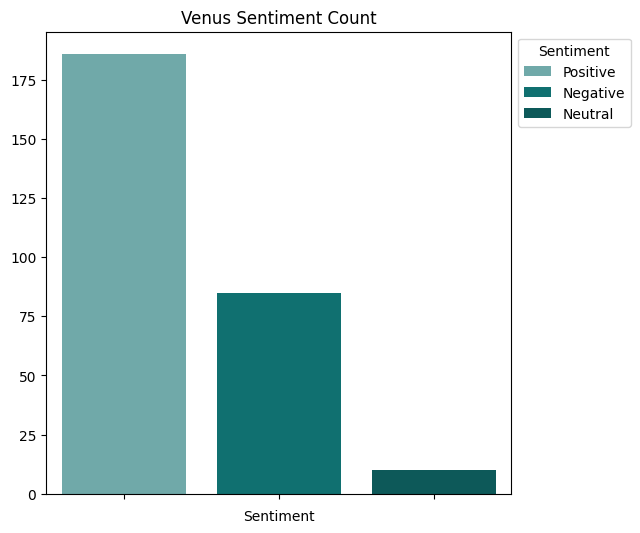

In [55]:
ax, fig = plt.subplots(figsize = (6,6))
ax =sns.countplot(x='Sentiment', data=Venus, dodge=False, hue='Sentiment',  order= Venus['Sentiment'].value_counts().index, hue_order =Venus['Sentiment'].value_counts().index,  palette=colors4);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Venus Sentiment Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [56]:
Corpus.drop('Company', inplace=True, axis=1)

# WordCloud

In [57]:
def word_cloud_(Sentiment):
    text = str(Corpus[Corpus['Sentiment'] == Sentiment])
    text = arabic_reshaper.reshape(text)
    text = get_display(text)
    wordcloud = WordCloud(font_path='arial.ttf',background_color='white', mode='RGB',width=1200,height=600).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='catrom')
    plt.axis("off")
    plt.title('Word Cloud For {} Sentiment'.format(Sentiment))
    plt.show()

**1-Positive** 

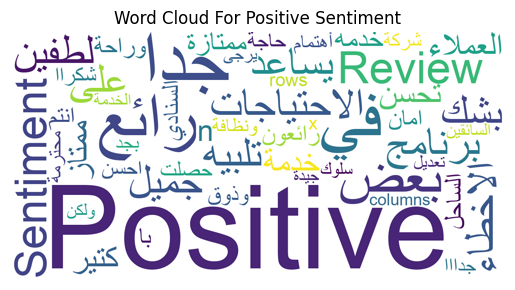

In [58]:
word_cloud_('Positive')

**2-Negative**

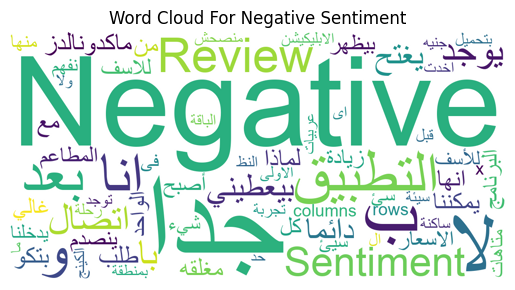

In [59]:
word_cloud_('Negative')

**3-Neutral**

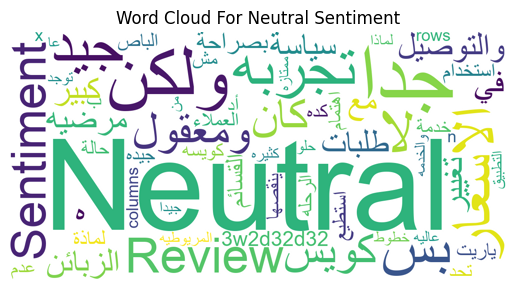

In [60]:
word_cloud_('Neutral')

# Word Tokenize

In [61]:
Corpus['Tokenized'] = Corpus['Review'].astype(str).apply(araby.tokenize)

In [62]:
Corpus['Tokenized']

0                                                   [رائع]
1        [برنامج, رائع, جدا, يساعد, على, تلبيه, الاحتيا...
2        [التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ...
3              [لماذا, لا, يمكننا, طلب, من, ماكدونالدز, ؟]
4        [البرنامج, بيظهر, كل, المطاعم, و, مغلقه, مع, ا...
                               ...                        
40041    [تجربه, جيده, بس, ينقصها, عدم, اهتمام, خدمة, ا...
40042    [انا, ساكنة, بمنطقة, الكينج, ولا, توجد, عربيات...
40043    [جيد, ولكن, لماذا, لا, توجد, خطوط, كثيره, من, ...
40044      [جيدا, جدا, ..., ولكن, الاسعار, عاليه, جدا, \n]
40045    [التطبيق, حلو, جدا, والخدمه, ممتازه, ولكن, الا...
Name: Tokenized, Length: 40045, dtype: object

# Number Of Words Before Text Normalization

In [63]:
Corpus["Number of Words1"] = Corpus["Tokenized"].apply(lambda n:len(n))
Corpus["Number of Words1"].sum()

384913

# Number Of Charachters Before Text Normalization

In [64]:
Corpus["Number of Charachters1"] = Corpus["Review"].str.len()
Corpus["Number of Charachters1"].sum()

2034649

# Number Of Sentences Before Text Normalization

In [65]:
NumberOfTexts1 = Corpus['Review'].astype(str).apply(lambda n:len(araby.sentence_tokenize(n)))
NumberOfTexts1.sum()

44475

# Average Number Of Words Before Text Normalization

In [66]:
AverageNaumberOfWords1 = round(Corpus["Number of Words1"].mean())
AverageNaumberOfWords1

10

# Average Number Of Charachters Before Text Normalization

In [67]:
AverageNumberOfCharachters1 = round(Corpus["Number of Charachters1"].mean())
AverageNumberOfCharachters1

51

# Most Frequent Words Before Text Normalization

In [68]:
MostFrequentWord1 = Counter((Corpus['Tokenized']).explode()).most_common(10)
MostFrequentWordDF1 = pd.DataFrame(MostFrequentWord1, columns=('Word', 'Count'))
MostFrequentWordDF1

,Word,Count
0,من,6928
1,جدا,6316
2,في,5593
3,و,4205
4,تطبيق,3866
5,التطبيق,3198
6,ما,2897
7,ممتاز,2712
8,لا,2680
9,بس,2468


In [69]:
fig = go.Figure(go.Funnel(
    y = MostFrequentWordDF1['Word'].tolist(),
    x = MostFrequentWordDF1['Count'].tolist(),
    marker = {"color": ["Salmon", "PaleVioletRed", "LightSalmon", "Moccasin", "Lavender", "DarkOliveGreen", "Turquoise", "Chocolate", "MistyRose", "Gainsboro"]}))
fig.show()

In [70]:
fig = px.bar(MostFrequentWordDF1, x='Word', y='Count')
fig.show()

# POS Tagging (Parts of Speech Tagging)

In [71]:
Corpus['Tagged'] = Corpus['Tokenized'].apply(pos_tag)
Corpus.reset_index(inplace=True, drop=True)
Corpus

,Review,Sentiment,Tokenized,Number of Words1,Number of Charachters1,Tagged
0,رائع,Positive,[رائع],1,4,"[(رائع, NN)]"
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,Positive,"[برنامج, رائع, جدا, يساعد, على, تلبيه, الاحتيا...",9,52,"[(برنامج, JJ), (رائع, NNP), (جدا, NNP), (يساعد..."
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,Negative,"[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ...",18,84,"[(التطبيق, JJ), (لا, NNP), (يغتح, NNP), (دائما..."
3,لماذا لا يمكننا طلب من ماكدونالدز؟,Negative,"[لماذا, لا, يمكننا, طلب, من, ماكدونالدز, ؟]",7,34,"[(لماذا, JJ), (لا, NNP), (يمكننا, NNP), (طلب, ..."
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,Negative,"[البرنامج, بيظهر, كل, المطاعم, و, مغلقه, مع, ا...",15,75,"[(البرنامج, JJ), (بيظهر, NNP), (كل, NNP), (الم..."
...,...,...,...,...,...,...
40040,تجربه جيده بس ينقصها عدم اهتمام خدمة العملاء ب...,Neutral,"[تجربه, جيده, بس, ينقصها, عدم, اهتمام, خدمة, ا...",23,111,"[(تجربه, JJ), (جيده, NNP), (بس, NNP), (ينقصها,..."
40041,انا ساكنة بمنطقة الكينج ولا توجد عربيات قبل ال...,Negative,"[انا, ساكنة, بمنطقة, الكينج, ولا, توجد, عربيات...",12,62,"[(انا, JJ), (ساكنة, NNP), (بمنطقة, NNP), (الكي..."
40042,جيد ولكن لماذا لا توجد خطوط كثيره من المريوطيه...,Neutral,"[جيد, ولكن, لماذا, لا, توجد, خطوط, كثيره, من, ...",17,80,"[(جيد, JJ), (ولكن, NNP), (لماذا, NNP), (لا, NN..."
40043,جيدا جدا ...ولكن الاسعار عاليه جدا\n,Neutral,"[جيدا, جدا, ..., ولكن, الاسعار, عاليه, جدا, \n]",8,35,"[(جيدا, NN), (جدا, NN), (..., :), (ولكن, JJ), ..."


# Bigrams

In [72]:
Corpus['Bigrams'] = Corpus['Tokenized'].apply(lambda x: list(nltk.bigrams(x)))
Corpus['Bigrams'][100]

[('مافيش', 'إشارة'),
 ('إشارة', 'برسالة'),
 ('برسالة', 'الطيار'),
 ('الطيار', 'ياريت'),
 ('ياريت', 'وده'),
 ('وده', 'شيء'),
 ('شيء', 'سيئ'),
 ('سيئ', 'جدًا'),
 ('جدًا', '👎')]

# Trigrams

In [73]:
Corpus['Trigrams'] = Corpus['Tokenized'].apply(lambda x: list(nltk.trigrams(x)))
Corpus['Trigrams'][100]

[('مافيش', 'إشارة', 'برسالة'),
 ('إشارة', 'برسالة', 'الطيار'),
 ('برسالة', 'الطيار', 'ياريت'),
 ('الطيار', 'ياريت', 'وده'),
 ('ياريت', 'وده', 'شيء'),
 ('وده', 'شيء', 'سيئ'),
 ('شيء', 'سيئ', 'جدًا'),
 ('سيئ', 'جدًا', '👎')]

# Ngrams

In [74]:
Corpus['Ngrams'] = Corpus['Tokenized'].apply(lambda x: list(nltk.ngrams(x, 4)))
Corpus['Ngrams'][100]

[('مافيش', 'إشارة', 'برسالة', 'الطيار'),
 ('إشارة', 'برسالة', 'الطيار', 'ياريت'),
 ('برسالة', 'الطيار', 'ياريت', 'وده'),
 ('الطيار', 'ياريت', 'وده', 'شيء'),
 ('ياريت', 'وده', 'شيء', 'سيئ'),
 ('وده', 'شيء', 'سيئ', 'جدًا'),
 ('شيء', 'سيئ', 'جدًا', '👎')]

# Text Normalization

In [75]:
def remove_emojis(text):
     text = emoji.demojize(text)   
     return text
def remove_puncuation_special_charchater(text):
       punctuations = '`؛،؟.,÷-' + string.punctuation
       text = text.translate(text.maketrans('', '', punctuations))
       return text                                                            
def remove_whitespace(text):
     text = text.replace('  ', ' ')
     return text
def remove_new_line_char(text):
     text = text.replace('\n', '')
     return text   
def trans_arabic_number(text):
     text = normalize_digits(text, source='all', out='west')
     return text
def remove_number(text):
     text = ''.join([i for i in text if not i.isdigit()])
     return text
def remove_url(text):
     text = re.sub(r"http\S+", '', text)
     return text
def remove_html_tag(text):
     text = etree.HTML(text)
     text = etree.tostring(text, method='text', encoding='unicode')
     return text
def remove_tashkeel_(text):
     text = araby.strip_tashkeel(text)
     return text
def remove_diacritics_(text):
     text = araby.strip_diacritics(text)
     return text
def remove_lastharaka(text):
     text = araby.strip_lastharaka(text)
     return text
def remove_tatweel(text):
     text = araby.strip_tatweel(text)
     return text
def normalize_alef_maksura_ar_(text):
     text = normalize_alef_maksura_ar(text)
     return text
def normalize_alef_ar_(text):
     text = normalize_alef_ar(text)
     return text
def normalize_teh_marbuta_ar_(text):
     text = normalize_teh_marbuta_ar(text)
     return text
def remove_non_arabic(text):
     text = re.sub('[a-zA-Z_]', '', text)
     return text
def remove_duplicated_letter(text):
    text = re.sub(r'(.)\1+', r'\1', text)
    return text 
def remove_stop_words(text):
     stopwprd1 = set(stp.stopwords_list())
     stopwprd2 = set(open('StopWords.txt','r').read().split('\n'))
     StopWords = stopwprd1.union(stopwprd2)
     text = text.split() 
     text = [word for word in text if word not in StopWords]
     return text
def lemmatizer_(text):
       lemmatizer =  qalsadi.lemmatizer.Lemmatizer()                                                 
       text = [lemmatizer.lemmatize(word) for word in text]  
       return text

In [76]:
def text_normalization(text):
    text = str(text) 
    text = remove_emojis(text)
    text = remove_whitespace(text)
    text = remove_new_line_char(text)
    text = trans_arabic_number(text)
    text = remove_number(text)
    text = remove_url(text)
    text = remove_html_tag(text)
    text = remove_puncuation_special_charchater(text)
    text = remove_tashkeel_(text)
    text = remove_diacritics_(text)
    text = remove_lastharaka(text)
    text = remove_tatweel(text)
    text = normalize_alef_maksura_ar_(text)
    text = normalize_alef_ar_(text)
    text = normalize_teh_marbuta_ar_(text)
    text = remove_non_arabic(text)
    text = remove_duplicated_letter(text)
    text = remove_stop_words(text)
    text = lemmatizer_(text)
    return ' '.join(text)

In [77]:
Corpus['Normalized_Review'] =Corpus['Tokenized'].apply(text_normalization)

In [78]:
Corpus

,Review,Sentiment,Tokenized,Number of Words1,Number of Charachters1,Tagged,Bigrams,Trigrams,Ngrams,Normalized_Review
0,رائع,Positive,[رائع],1,4,"[(رائع, NN)]",[],[],[],رائع
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,Positive,"[برنامج, رائع, جدا, يساعد, على, تلبيه, الاحتيا...",9,52,"[(برنامج, JJ), (رائع, NNP), (جدا, NNP), (يساعد...","[(برنامج, رائع), (رائع, جدا), (جدا, يساعد), (ي...","[(برنامج, رائع, جدا), (رائع, جدا, يساعد), (جدا...","[(برنامج, رائع, جدا, يساعد), (رائع, جدا, يساعد...",برنامج رائع ساعد ألب احتياج سرع
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,Negative,"[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ...",18,84,"[(التطبيق, JJ), (لا, NNP), (يغتح, NNP), (دائما...","[(التطبيق, لا), (لا, يغتح), (يغتح, دائما), (دا...","[(التطبيق, لا, يغتح), (لا, يغتح, دائما), (يغتح...","[(التطبيق, لا, يغتح, دائما), (لا, يغتح, دائما,...",تطبيق يغتح بيعطيني أوجد اتصال بالشبكه نت تمام ...
3,لماذا لا يمكننا طلب من ماكدونالدز؟,Negative,"[لماذا, لا, يمكننا, طلب, من, ماكدونالدز, ؟]",7,34,"[(لماذا, JJ), (لا, NNP), (يمكننا, NNP), (طلب, ...","[(لماذا, لا), (لا, يمكننا), (يمكننا, طلب), (طل...","[(لماذا, لا, يمكننا), (لا, يمكننا, طلب), (يمكن...","[(لماذا, لا, يمكننا, طلب), (لا, يمكننا, طلب, م...",مكن طلب ماكدونالدز
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,Negative,"[البرنامج, بيظهر, كل, المطاعم, و, مغلقه, مع, ا...",15,75,"[(البرنامج, JJ), (بيظهر, NNP), (كل, NNP), (الم...","[(البرنامج, بيظهر), (بيظهر, كل), (كل, المطاعم)...","[(البرنامج, بيظهر, كل), (بيظهر, كل, المطاعم), ...","[(البرنامج, بيظهر, كل, المطاعم), (بيظهر, كل, ا...",برنامج بيظهر مطاعم مغلق تكون فاتح بقال دهي اكترى
...,...,...,...,...,...,...,...,...,...,...
40040,تجربه جيده بس ينقصها عدم اهتمام خدمة العملاء ب...,Neutral,"[تجربه, جيده, بس, ينقصها, عدم, اهتمام, خدمة, ا...",23,111,"[(تجربه, JJ), (جيده, NNP), (بس, NNP), (ينقصها,...","[(تجربه, جيده), (جيده, بس), (بس, ينقصها), (ينق...","[(تجربه, جيده, بس), (جيده, بس, ينقصها), (بس, ي...","[(تجربه, جيده, بس, ينقصها), (جيده, بس, ينقصها,...",جرب جيد نقص اهتمام خدم عملاء عميل مر تواصل الش...
40041,انا ساكنة بمنطقة الكينج ولا توجد عربيات قبل ال...,Negative,"[انا, ساكنة, بمنطقة, الكينج, ولا, توجد, عربيات...",12,62,"[(انا, JJ), (ساكنة, NNP), (بمنطقة, NNP), (الكي...","[(انا, ساكنة), (ساكنة, بمنطقة), (بمنطقة, الكين...","[(انا, ساكنة, بمنطقة), (ساكنة, بمنطقة, الكينج)...","[(انا, ساكنة, بمنطقة, الكينج), (ساكنة, بمنطقة,...",ساكن منطق الكينج توجد عرب الساعه نصف
40042,جيد ولكن لماذا لا توجد خطوط كثيره من المريوطيه...,Neutral,"[جيد, ولكن, لماذا, لا, توجد, خطوط, كثيره, من, ...",17,80,"[(جيد, JJ), (ولكن, NNP), (لماذا, NNP), (لا, NN...","[(جيد, ولكن), (ولكن, لماذا), (لماذا, لا), (لا,...","[(جيد, ولكن, لماذا), (ولكن, لماذا, لا), (لماذا...","[(جيد, ولكن, لماذا, لا), (ولكن, لماذا, لا, توج...",جيد توجد خطوط كثير المريوطيه فيصل حت نادى الرم...
40043,جيدا جدا ...ولكن الاسعار عاليه جدا\n,Neutral,"[جيدا, جدا, ..., ولكن, الاسعار, عاليه, جدا, \n]",8,35,"[(جيدا, NN), (جدا, NN), (..., :), (ولكن, JJ), ...","[(جيدا, جدا), (جدا, ...), (..., ولكن), (ولكن, ...","[(جيدا, جدا, ...), (جدا, ..., ولكن), (..., ولك...","[(جيدا, جدا, ..., ولكن), (جدا, ..., ولكن, الاس...",الاسعار عال


# Number Of Words After Text Normalization

In [79]:
Corpus["Number of Words2"] = Corpus["Normalized_Review"].apply(lambda n:len(n.split( )))
Corpus["Number of Words2"].sum()

262094

# Number Of Charachters After Text Normalization

In [80]:
Corpus["Number of Charachters2"] = Corpus["Review"].str.len()
Corpus["Number of Charachters2"].sum()

2034649

# Number Of Sentences After Text Normalization

In [81]:
NumberOfTexts2 = Corpus['Normalized_Review'].apply(lambda n:len(araby.sentence_tokenize(n)))
NumberOfTexts2.sum()

40045

# Average Number Of Words After Text Normalization

In [82]:
AverageNaumberOfWords2 = round(Corpus["Number of Words2"].mean())
AverageNaumberOfWords2

7

# Average Number Of Charachters After Text Normalization

In [83]:
AverageNumberOfCharachters2 = round(Corpus["Number of Charachters2"].mean())
AverageNumberOfCharachters2

51

# Most Frequent Words After Text Normalization

In [84]:
MostFrequentWord2 = Counter((Corpus['Normalized_Review']).str.split().explode()).most_common(10)
MostFrequentWordDF2 = pd.DataFrame(MostFrequentWord2, columns=('Word', 'Count'))
MostFrequentWordDF2

,Word,Count
0,تطبيق,7703
1,طلب,6270
2,برنامج,4605
3,توصيل,3187
4,متاز,2924
5,مطاعم,2494
6,رائع,2380
7,حلو,2379
8,جميل,2373
9,خدم,2371


In [85]:
fig = go.Figure(go.Funnel(
    y = MostFrequentWordDF2['Word'].tolist(),
    x = MostFrequentWordDF2['Count'].tolist(),
    marker = {"color": ["Salmon", "PaleVioletRed", "LightSalmon", "Moccasin", "Lavender", "DarkOliveGreen", "Turquoise", "Chocolate", "MistyRose", "Gainsboro"]}))
fig.show()

In [86]:
fig = px.bar(MostFrequentWordDF2, x='Word', y='Count')
fig.show()

# Split The DataSet Into Independent Variables (X) And Dependent Variable (Y)

In [87]:
X= Corpus['Normalized_Review']
y = Corpus['Sentiment']

# Split The Dataset Into Training And Testing

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# TfidfVectorizer

In [89]:
Tfidf = TfidfVectorizer()
X_Train_Tfidf = Tfidf.fit_transform(X_train)
X_test_Tfidf = Tfidf.transform(X_test)

In [90]:
vocab = Tfidf.vocabulary_
vocab

{'خدم': 7934,
 'سريع': 9139,
 'جميل': 7433,
 'ماش': 12676,
 'راضى': 8489,
 'عمل': 10525,
 'حساب': 7674,
 'اصلا': 1412,
 'عارف': 10136,
 'لاه': 11928,
 'هشيلو': 15583,
 'تان': 6286,
 'تمام': 6944,
 'لكن': 12200,
 'تطبيق': 6652,
 'بالغ': 4646,
 'الانجليزيه': 2145,
 'مكن': 14432,
 'احول': 769,
 'عرب': 10340,
 'سوبر': 9296,
 'ماركت': 12646,
 'مخازن': 13578,
 'احبت': 689,
 'مشروع': 13985,
 'طعام': 9979,
 'جار': 7234,
 'حذف': 7638,
 'محافظ': 13479,
 'سويس': 9323,
 'وصل': 17039,
 'مناسب': 14511,
 'برنامج': 5201,
 'صراح': 9732,
 'كويس': 11626,
 'فر': 10873,
 'عد': 10310,
 'اختيار': 804,
 'شباب': 9425,
 'قات': 11062,
 'منطق': 14591,
 'واد': 15966,
 'دواسر': 8325,
 'اتمني': 586,
 'رد': 8591,
 'ليش': 12336,
 'جاز': 7235,
 'سكر': 9185,
 'فاشل': 10787,
 'توصيل': 7091,
 'سيئ': 9337,
 'متقيد': 13349,
 'وقت': 17136,
 'احه': 767,
 'ياخذو': 17819,
 'فلوس': 10965,
 'ردى': 8600,
 'وافى': 16127,
 'شكاوي': 9542,
 'اتصال': 480,
 'الاحمد': 1852,
 'جرب': 7348,
 'زي': 8937,
 'زفت': 8875,
 'الاوردر': 2186,
 'سعة

# Models

In [91]:
def models_(model_name):
    model = model_name
    model.fit(X_Train_Tfidf, y_train)
    y_pred = model.predict(X_test_Tfidf)
    return y_pred

# Confusion Matrix

In [92]:
Sentiments = y.sort_values().unique()

In [93]:
def confusion_matrix_(Real, Prediction):
        ConfusionMatrix = confusion_matrix(Real, Prediction, labels=Sentiments)
        return ConfusionMatrix

In [94]:
def plot_confusion_matrix(ConfusionMatrix, name):
    fig, ax = plt.subplots(figsize=(6, 6))
    df = pd.DataFrame(ConfusionMatrix, columns=Sentiments, index=Sentiments)
    sns.heatmap(df, annot=True, cmap='YlGnBu', fmt='', cbar=False)
    plt.ylabel('Actual',fontsize=10)
    plt.xlabel('Prediction',fontsize=10)
    plt.title('{} Confusion Matrix'.format(name),fontsize=10)
    return plt.show();

# Generate True Positive, False Positive, True Negative, False Negative

In [95]:
def positive_negative(Confusin_Matrix):
    False_Postive = Confusin_Matrix.sum(axis=0) - np.diag(Confusin_Matrix)
    False_Postive = False_Postive.astype(int)
    False_Postive = sum(False_Postive)

    True_Positive = np.diag(Confusin_Matrix)
    True_Positive = True_Positive.astype(int)
    True_Positive = sum(True_Positive)

    False_Negative = Confusin_Matrix.sum(axis=1) - np.diag(Confusin_Matrix)
    False_Negative = False_Negative.astype(int)
    False_Negative = sum(False_Negative)
    
    True_Negative = Confusin_Matrix.sum()
    X = (Confusin_Matrix.sum(axis=0) - np.diag(Confusin_Matrix)) + (Confusin_Matrix.sum(axis=1) - np.diag(Confusin_Matrix)) + np.diag(Confusin_Matrix)
    True_Negative = True_Negative.astype(int) - X
    True_Negative = sum(True_Negative)

    return False_Postive, True_Positive, False_Negative, True_Negative

# Performance Merics

In [96]:
def performance_metrics(False_Postive, True_Positive, False_Negative, True_Negative):
     Accuracy = (True_Positive + True_Negative) / (True_Positive + True_Negative + False_Postive + False_Negative)
     Precision = True_Positive / (True_Positive+ False_Postive)
     Sensitivity = True_Positive / (True_Positive  + False_Negative)
     Specificity = True_Negative / (True_Negative + False_Negative)
     F1Score = (True_Positive) / ((True_Positive) + (0.5 *(False_Postive + False_Negative)))
     Error = 1 - Accuracy
     MetricsValues = pd.DataFrame(index=['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1Score', 'Error'], columns=['Values'], data=[Accuracy, Precision, Sensitivity, Specificity, F1Score, Error])
     return MetricsValues


# Machine Learning

**1. Naive Bayes**

In [97]:
model_name1 = MultinomialNB()
y_pred1 = models_(model_name1)

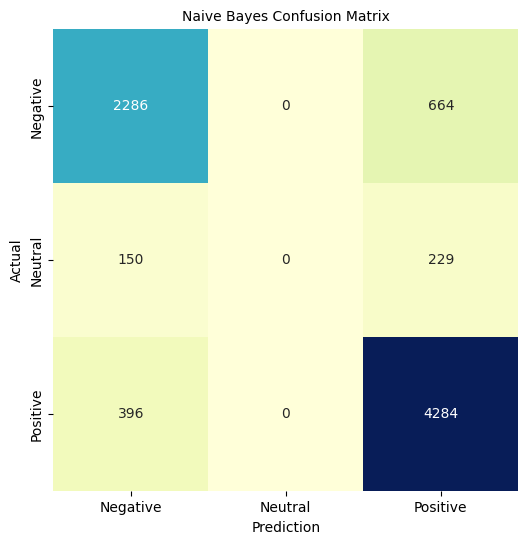

In [98]:
cm1 = confusion_matrix_(y_test, y_pred1)
plot_confusion_matrix(cm1, 'Naive Bayes')


In [99]:
False_Postive, True_Positive, False_Negative, True_Negative = positive_negative(cm1)

In [100]:
MetricsValues1 = performance_metrics(False_Postive, True_Positive, False_Negative, True_Negative)

In [101]:
MetricsValues1

,Values
Accuracy,0.880218
Precision,0.820327
Sensitivity,0.820327
Specificity,0.910164
F1Score,0.820327
Error,0.119782


**2. Logistic Regression**

In [102]:
model_name2 = LogisticRegression()
y_pred2 = models_(model_name2)

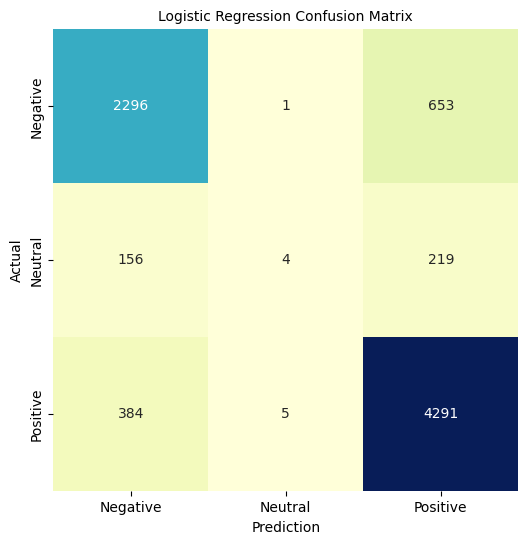

In [103]:
cm2 = confusion_matrix_(y_test, y_pred2)
plot_confusion_matrix(cm2, 'Logistic Regression')

In [104]:
False_Postive2, True_Positive2, False_Negative2, True_Negative2 = positive_negative(cm2)
MetricsValues2 = performance_metrics(False_Postive2, True_Positive2, False_Negative2, True_Negative2)
MetricsValues2

,Values
Accuracy,0.881966
Precision,0.822949
Sensitivity,0.822949
Specificity,0.911475
F1Score,0.822949
Error,0.118034


**3. Decision Tree**

In [105]:
model_name3 = DecisionTreeClassifier(criterion = 'entropy')
y_pred3 = models_(model_name3)

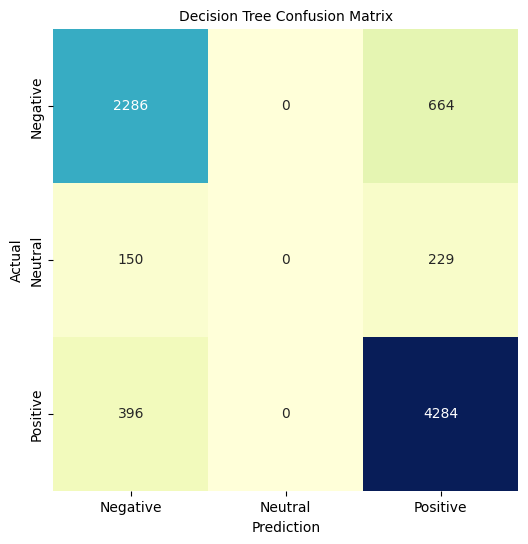

In [106]:
cm3 = confusion_matrix_(y_test, y_pred3)
plot_confusion_matrix(cm1, 'Decision Tree')

In [107]:
False_Postive3, True_Positive3, False_Negative3, True_Negative3 = positive_negative(cm3)
MetricsValues3 = performance_metrics(False_Postive3, True_Positive3, False_Negative3, True_Negative3)
MetricsValues3

,Values
Accuracy,0.846423
Precision,0.769634
Sensitivity,0.769634
Specificity,0.884817
F1Score,0.769634
Error,0.153577


**4. K Nearest Neighbor**

In [108]:
model_name4 = KNeighborsClassifier(metric='cosine', n_neighbors=1)
y_pred4 = models_(model_name4)

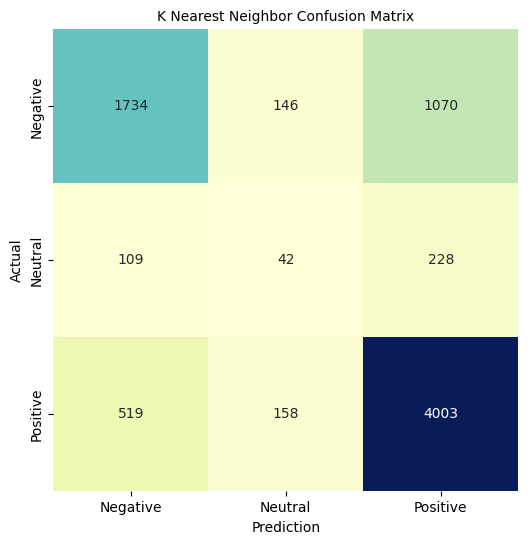

In [109]:
cm4 = confusion_matrix_(y_test, y_pred4)
plot_confusion_matrix(cm4, 'K Nearest Neighbor')

In [110]:
False_Postive4, True_Positive4, False_Negative4, True_Negative4 = positive_negative(cm4)
MetricsValues4 = performance_metrics(False_Postive4, True_Positive4, False_Negative4, True_Negative4)
MetricsValues4

,Values
Accuracy,0.814375
Precision,0.721563
Sensitivity,0.721563
Specificity,0.860782
F1Score,0.721563
Error,0.185625


**5. Random Forest**

In [111]:
model_name5 = RandomForestClassifier(criterion = 'entropy', n_estimators=100)
y_pred5 = models_(model_name5)

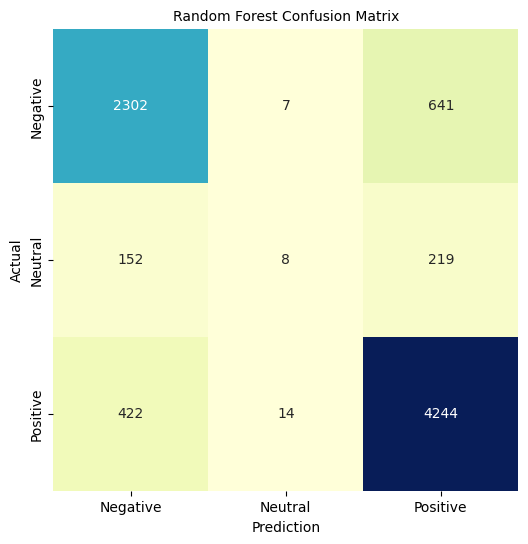

In [112]:
cm5 = confusion_matrix_(y_test, y_pred5)
plot_confusion_matrix(cm5, 'Random Forest')

In [113]:
False_Postive5, True_Positive5, False_Negative5, True_Negative5 = positive_negative(cm5)
MetricsValues5 = performance_metrics(False_Postive5, True_Positive5, False_Negative5, True_Negative5)
MetricsValues5

,Values
Accuracy,0.878886
Precision,0.818329
Sensitivity,0.818329
Specificity,0.909165
F1Score,0.818329
Error,0.121114


**6.SGD Classifier**

In [114]:
model_name6 = SGDClassifier(loss='hinge')
y_pred6 = models_(model_name6)

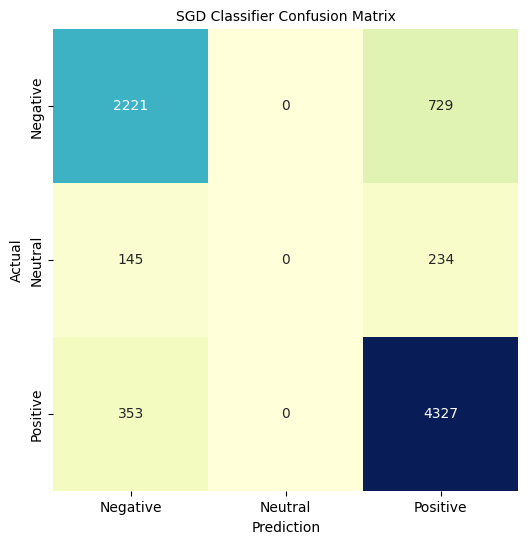

In [115]:
cm6 = confusion_matrix_(y_test, y_pred6)
plot_confusion_matrix(cm6, 'SGD Classifier')

In [116]:
False_Postive6, True_Positive6, False_Negative6, True_Negative6 = positive_negative(cm6)
MetricsValues6 = performance_metrics(False_Postive6, True_Positive6, False_Negative6, True_Negative6)
MetricsValues6

,Values
Accuracy,0.878387
Precision,0.817580
Sensitivity,0.817580
Specificity,0.908790
F1Score,0.817580
Error,0.121613


**7.Support  Vector Machine**

In [117]:
model_name7 = SVC(kernel='rbf')
y_pred7 = models_(model_name7)

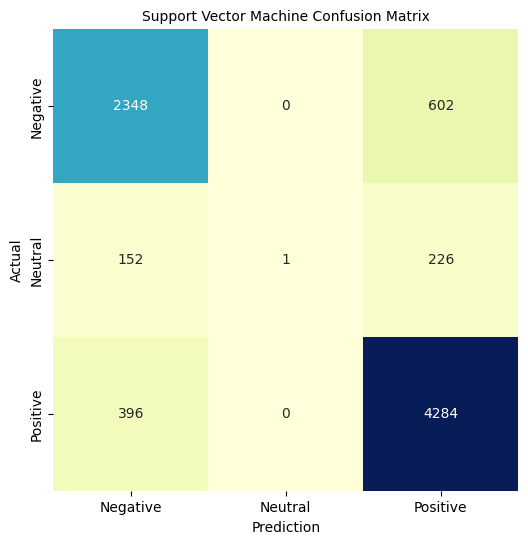

In [118]:
cm7 = confusion_matrix_(y_test, y_pred7)
plot_confusion_matrix(cm7, 'Support Vector Machine')

In [119]:
False_Postive7, True_Positive7, False_Negative7, True_Negative7 = positive_negative(cm7)
MetricsValues7 = performance_metrics(False_Postive7, True_Positive7, False_Negative7, True_Negative7)
MetricsValues7

,Values
Accuracy,0.885462
Precision,0.828193
Sensitivity,0.828193
Specificity,0.914097
F1Score,0.828193
Error,0.114538


**8- Multilayer Perceptron (MLP) Classifier**

In [120]:
model_name8 = MLPClassifier(hidden_layer_sizes = 100, activation='tanh')
y_pred8 = models_(model_name8)

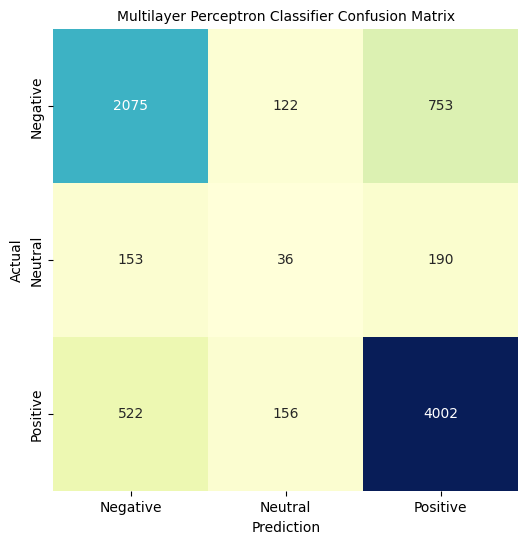

In [121]:
cm8 = confusion_matrix_(y_test, y_pred8)
plot_confusion_matrix(cm8, 'Multilayer Perceptron Classifier')

In [122]:
False_Postive8, True_Positive8, False_Negative8, True_Negative8 = positive_negative(cm8)
MetricsValues8 = performance_metrics(False_Postive8, True_Positive8, False_Negative8, True_Negative8)
MetricsValues8

,Values
Accuracy,0.842178
Precision,0.763266
Sensitivity,0.763266
Specificity,0.881633
F1Score,0.763266
Error,0.157822
